<a href="https://colab.research.google.com/github/mateussdreis/modelos_machine_learning/blob/main/Regress%C3%A3o_linear_com%C3%A9rcio_online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

Esse trabalho simula m contrato de trabalho com uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site.

## Importações


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtenção de dados

Trabalharemos com o arquivo csv do EcommerceCustomers da empresa. A abse possui informações do cliente, como Email, Endereço e sua cor Avatar. Destaca-se que ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
db1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projeto dados/introdução a machine learning/regressão linear/EcommerceCustomers.csv")

**Verificando o cabeçalho dos clientes e seus métodos info () e suas métricas describe().**

In [6]:
display(db1)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [7]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
db1.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Análise de dados exploratória

**Vamos explorar os dados!**

Pelo resto do trabalho, só estaremos usando os dados numéricos do arquivo csv.


<Figure size 1000x1000 with 0 Axes>

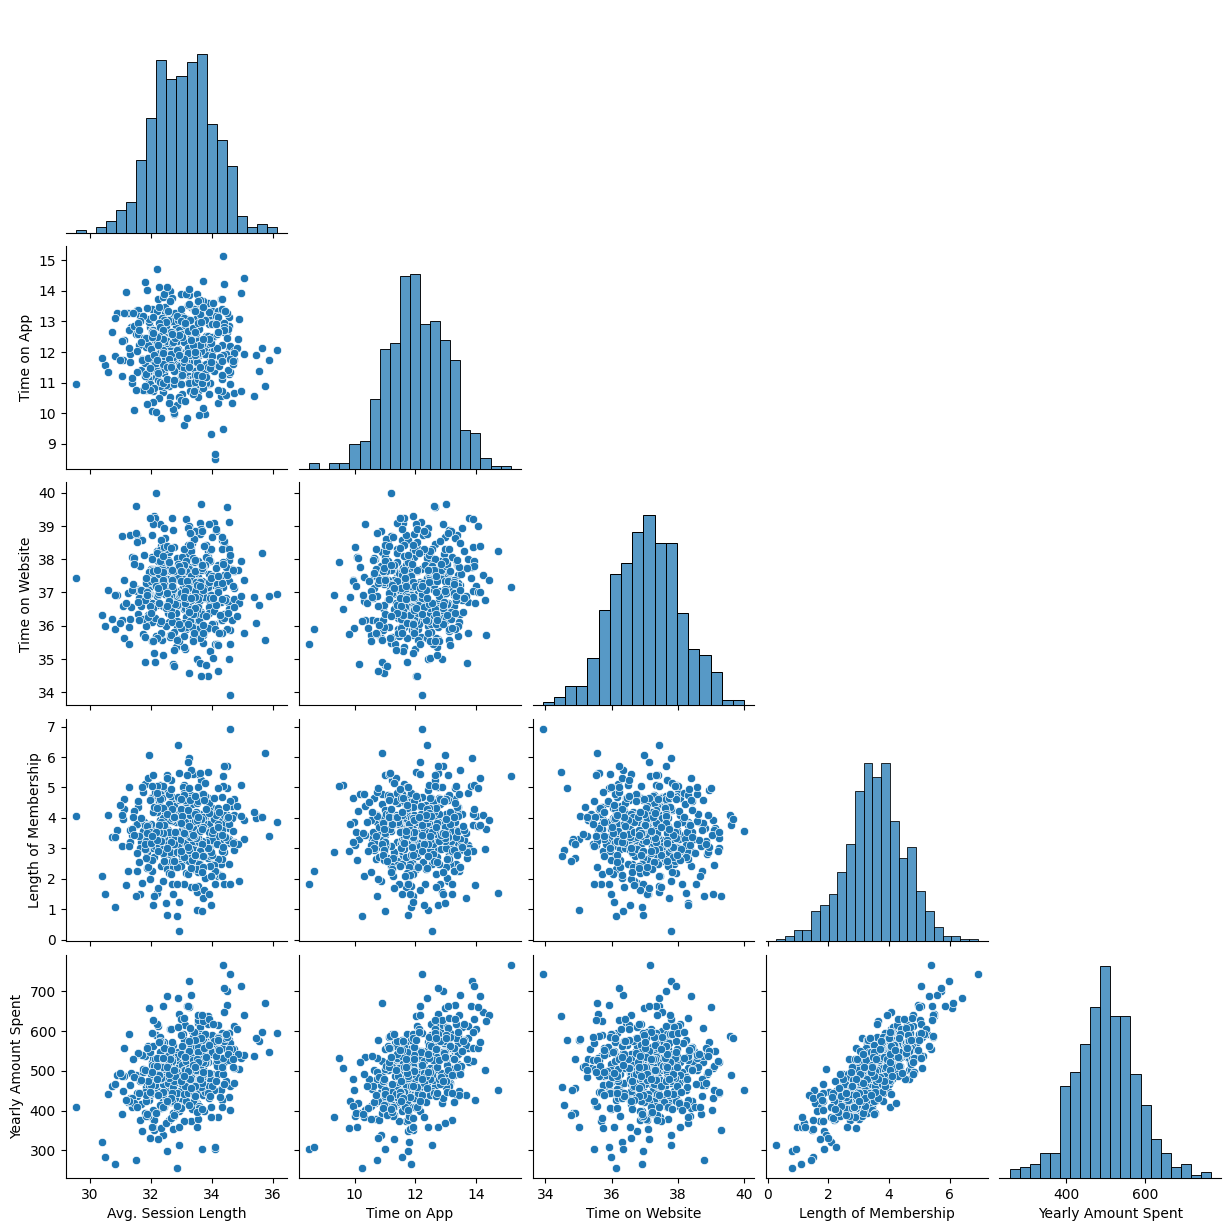

In [12]:
#**Use seaborn para criar um jointplot para comparar as colunas Time On Website e Volume anual. A correlação faz sentido?**

plt.figure(figsize=(10,10))
sns.pairplot(db1, corner = True)

Verificando as correlações

In [15]:
var_num = db1.drop(['Email','Address','Avatar'], axis=1)

Text(0.5, 1.0, 'Correlações')

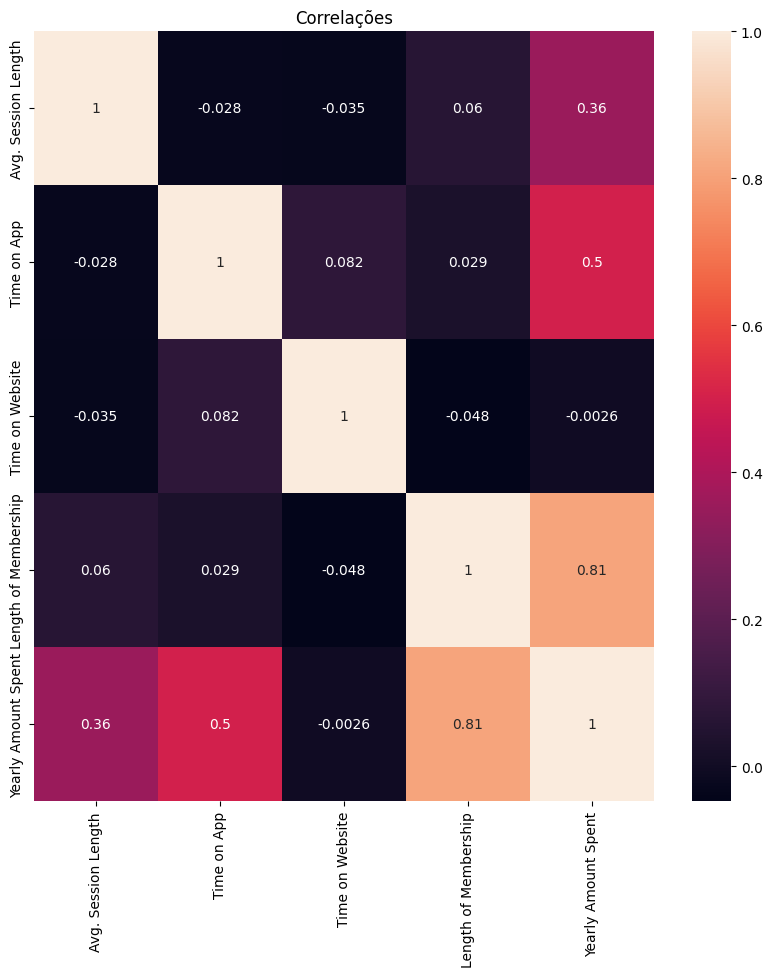

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(var_num.corr(), annot=True)
plt.title('Correlações')

Pelo gráfico de correlações, é possível verificar que apenas 3 variaveis tem correlações relevantes: Yearly Amount Spent x Avg Session Lenght, Yearly Amount Spent x Time on App e Yearly Amount Spent Lenght of Membership.

Como ultima etapa da visualização de dados, iremos explorar boxplots para verificar os valores médios de cada variável numérica

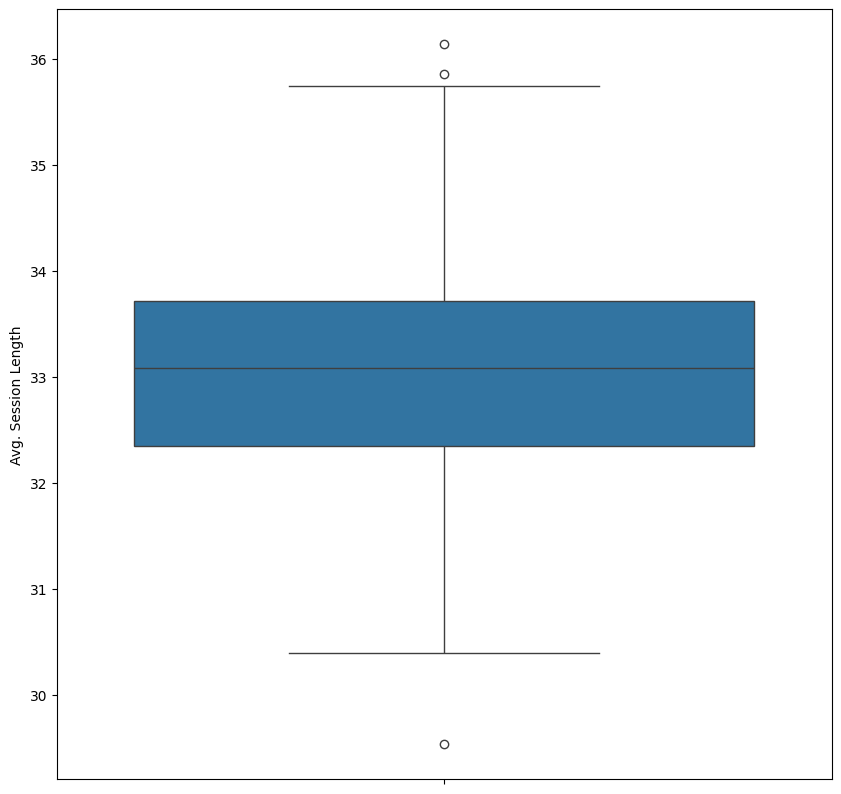

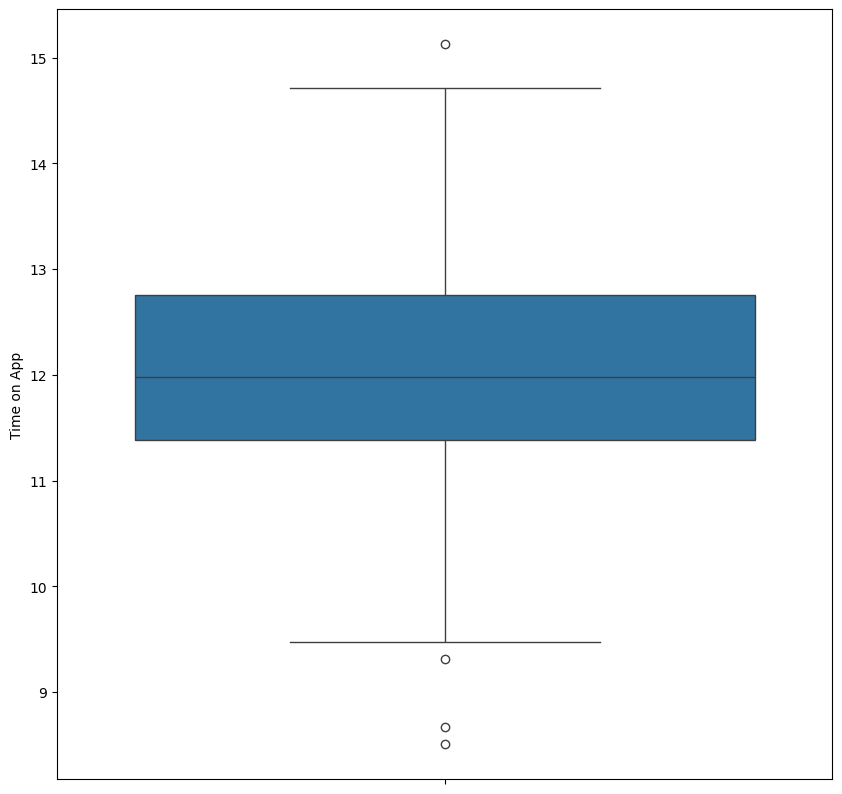

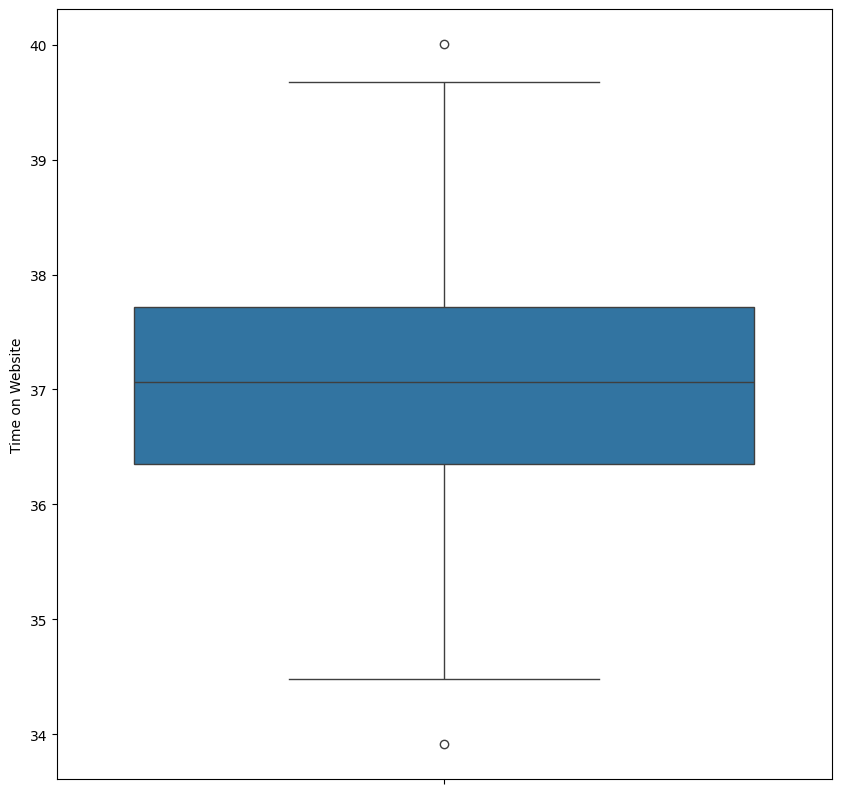

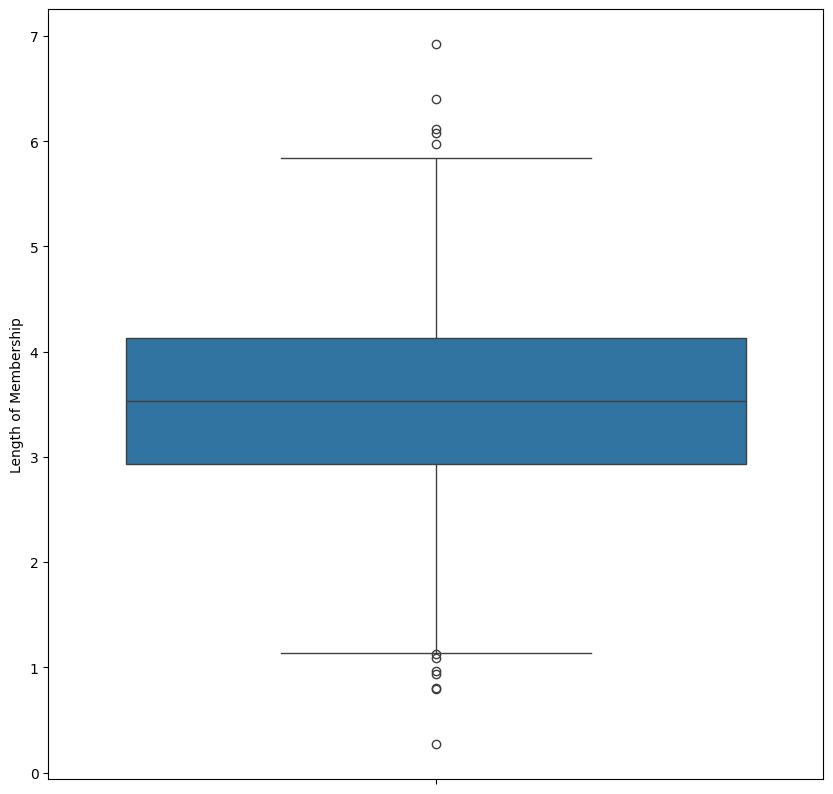

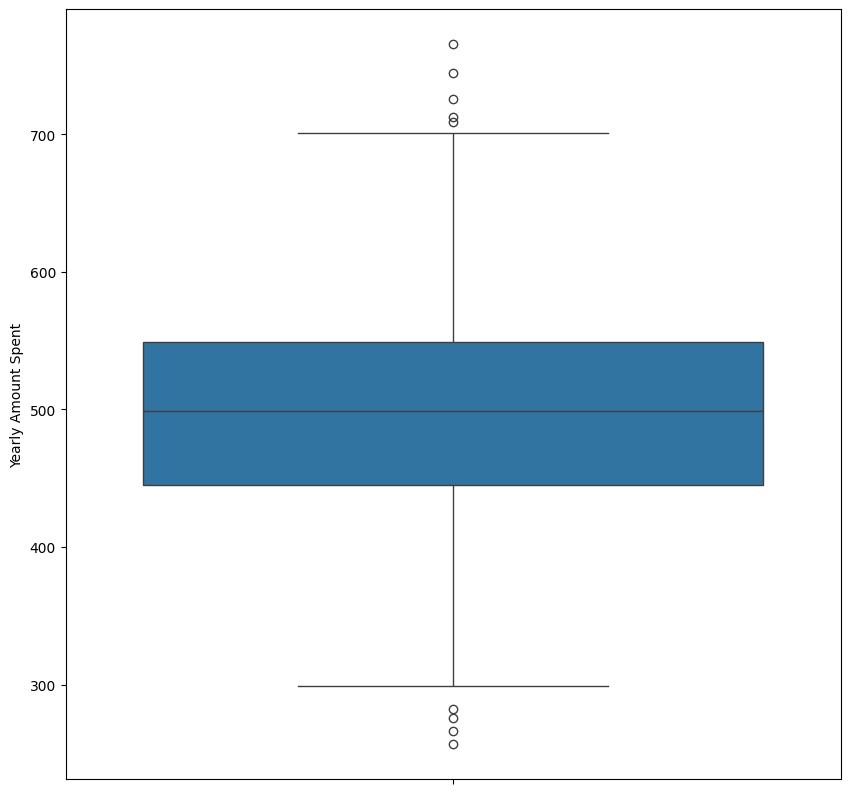

In [30]:
for i in var_num:
  plt.figure(figsize=(10,10))
  sns.boxplot(var_num[i])

## Treinando e testando os dados

Agora que exploramos um pouco os dados, vamos avançar e dividir os dados em conjuntos de treinamento e teste.
** Defina uma variável X igual a todas as características numéricas dos clientes e uma variável y igual à coluna Valor anual gasto (Yearly Amount Spent). **

In [98]:
X = var_num[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = var_num[['Yearly Amount Spent']]

In [99]:
print(X.shape,y.shape) # verificando se será necessário fazer formatação dos dados

(500, 4) (500, 1)


**Use model_selection.train_test_split da sklearn para dividir os dados em conjuntos de treinamento e teste. Defina test_size = 0.3 e random_state = 101**

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## Treinando o modelo

Agora é hora de treinar nosso modelo em nossos dados de treinamento!

**Importe LinearRegression do sklearn.linear_model**

In [101]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

**Print dos coeficientes do modelo**

In [102]:
print(lm.coef_)


[[25.72425621 38.59713548  0.45914788 61.67473243]]


## Previsão de dados de teste
Agora que nos ajustamos ao nosso modelo, vamos avaliar o seu desempenho ao prever os valores de teste!


In [103]:
previsoes = lm.predict(X_test)

**Diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos.**

<Axes: >

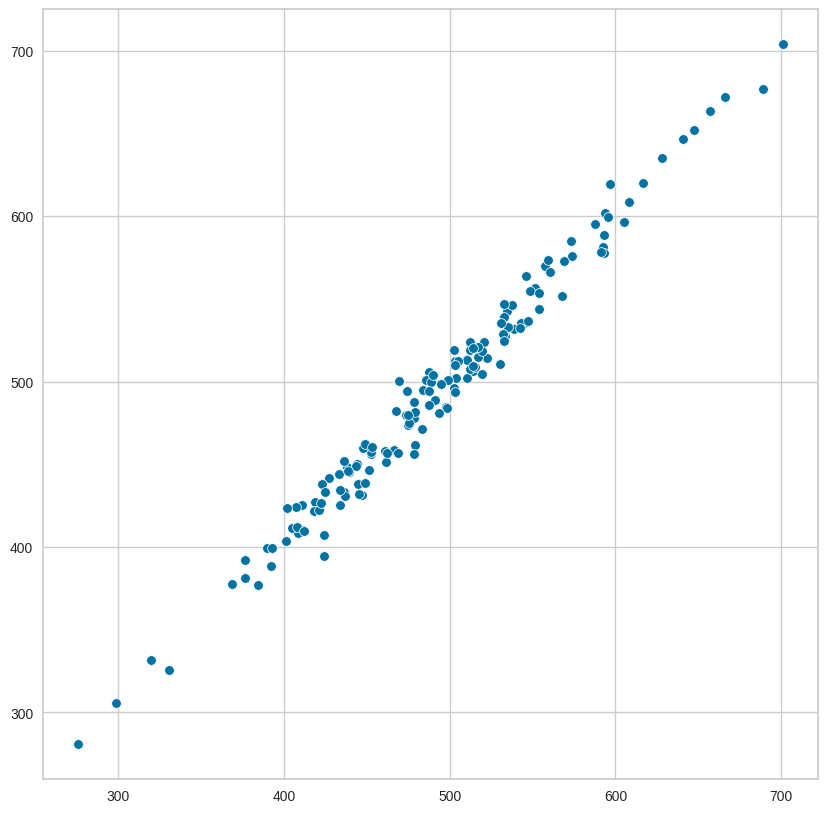

In [104]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = y_test.to_numpy().ravel(), y = previsoes.ravel())

## Avaliando o Modelo


In [105]:
import sklearn.metrics as sm

r2 = sm.r2_score(y_test, previsoes)
mse = sm.mean_squared_error(y_test, previsoes)
rmse = np.sqrt(sm.mean_squared_error(y_test, previsoes))
mae = sm.mean_absolute_error(y_test, previsoes)
print("MAE:", mae)
print("RMSE:", rmse)
print("MSE:", mse)
print("R²:", r2)

MAE: 8.426091641432116
RMSE: 10.193897260863155
MSE: 103.91554136503333
R²: 0.9808757641125855


* MAE (Erro Médio Absoluto):

O MAE mede a diferença absoluta média entre os valores previstos e os valores reais.
Neste caso, o MAE é 8.42, o que significa que, em média, as previsões estão erradas em cerca de 8.42 unidades.

* RMSE (Erro Quadrático Médio):

O RMSE é semelhante ao MAE, mas penaliza erros maiores mais fortemente.
O RMSE para este modelo é 10.19, o que significa que o erro médio é de cerca de 57.71 unidades.

* MSE (Erro Quadrático Médio):

O MSE é a versão quadrada do RMSE.
É mais sensível a valores discrepantes do que o MAE e o RMSE porque eleva os erros ao quadrado.
O MSE para este modelo é 103.91.

* R² (R-quadrado):

O R² mede a proporção da variância na variável dependente que é previsível a partir das variáveis independentes.
Varia de 0 a 1, com 1 indicando um ajuste perfeito e 0 indicando nenhum ajuste.
O R² para este modelo é 0.98, o que significa que cerca de 98% da variância na variável dependente pode ser explicada pelas variáveis independentes.

* Interpretação Geral:

As métricas MAE, RMSE, MSE e R² sugerem que o modelo está tendo um desempenho muito bom. O MAE e o RMSE são relativamente baixos, indicando que as previsões estão geralmente próximas dos valores reais. O MSE também é relativamente baixo, indicando que os erros não são muito grandes. O R² é muito alto, indicando que o modelo explica uma grande quantidade da variância nos dados.

No geral, essas métricas sugerem que o modelo tem um bom ajuste.

## Resíduos

Você deve ter obtido um modelo muito bom com um bom ajuste. Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os nossos dados.

**Trace um histograma dos resíduos e certifique-se de que ele parece normalmente distribuído. Use o seaborn distplot, ou apenas o plt.hist ().**

<ipython-input-107-600ae1f64e41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - previsoes), bins =50)


Text(0.5, 1.0, 'Resíduos')

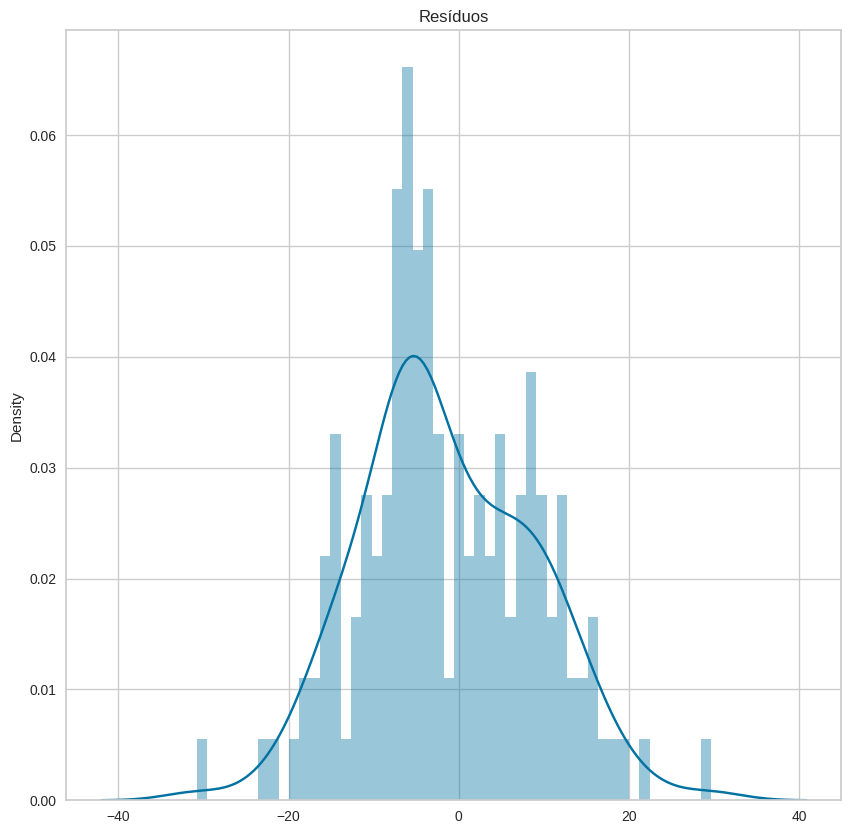

In [107]:
plt.figure(figsize=(10,10))
sns.distplot((y_test - previsoes), bins =50)
plt.title('Resíduos')

## Conclusão
Observe o quadro abaixo.

In [106]:
coeficientes = pd.DataFrame(lm.coef_.T, index= X.columns )
coeficientes

,0
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


**Como você pode interpretar esses coeficientes?**

Para esse modelo, verifica-se que aumentar o tempo em que o cliente é membro (length of Membership) implica num ganho de 61.67 dolares anuais. Logo essa métrica deve ser estimulada. Observa-se que há ganhos menores com o tempo no website do que no app. Logo, estratégicamente o app deve receber mais investimentos e atenção pois se mostrou mais lucrativo. Infere-se também que estudos devem ser feitos para melhorar o desempenho do website, visto que ele é a variável que menos gera lucros de forma alarmante.